## SOM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('University_prep.csv', sep=';')
df

,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Citations,GDP,Industry_Income
0,20664.0,11.2,8472.0,0.46,0.54,90.5,98.4,41627.0,65.5
1,2240.0,6.4,672.0,0.34,0.66,92.1,97.9,60236.0,88.0
2,18978.0,10.9,7022.0,0.47,0.53,91.4,95.8,41627.0,59.3
3,16135.0,7.3,3711.0,0.43,0.57,92.8,99.9,60236.0,66.2
4,11247.0,8.6,3824.0,0.39,0.61,90.5,99.5,60236.0,86.9
...,...,...,...,...,...,...,...,...,...
1351,20174.0,17.8,0.0,0.55,0.45,16.2,6.1,14064.0,35.6
1352,34101.0,21.3,0.0,0.57,0.43,15.3,6.7,14064.0,35.1
1353,15236.0,11.1,3.0,0.63,0.37,17.0,4.5,28053.0,36.9
1354,17101.0,24.9,0.0,0.54,0.46,13.8,7.6,14064.0,35.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
#df = pd.DataFrame(df, columns = ['Number_students','Numb_students_per_Staff','International_Students','Percentage_Female','Percentage_Male','Teaching','Citations','GDP','Industry_Income']).round()

In [4]:
X = df[:, [3,6,7]]

In [5]:
X 

array([[0.46      , 0.9837233 , 0.36498802],
       [0.34      , 0.97863683, 0.53716126],
       [0.47      , 0.95727365, 0.36498802],
       ...,
       [0.63      , 0.02848423, 0.23939935],
       [0.54      , 0.06002035, 0.10997104],
       [0.12      , 0.017294  , 0.36270274]])

In [6]:
#! pip install SimpSOM

In [7]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(13, 10, X, PBC=True)
net.train(0.01, 20000)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


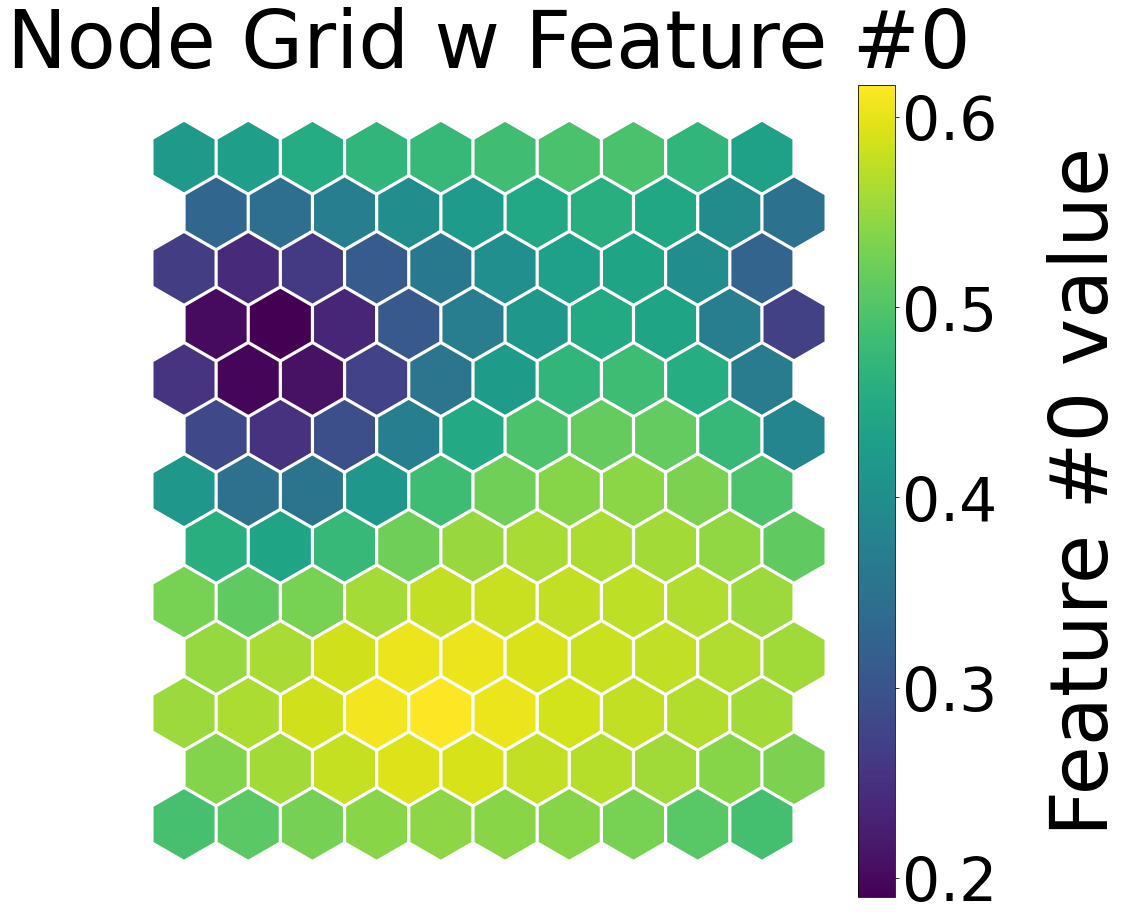

In [8]:
net.nodes_graph(colnum=0)

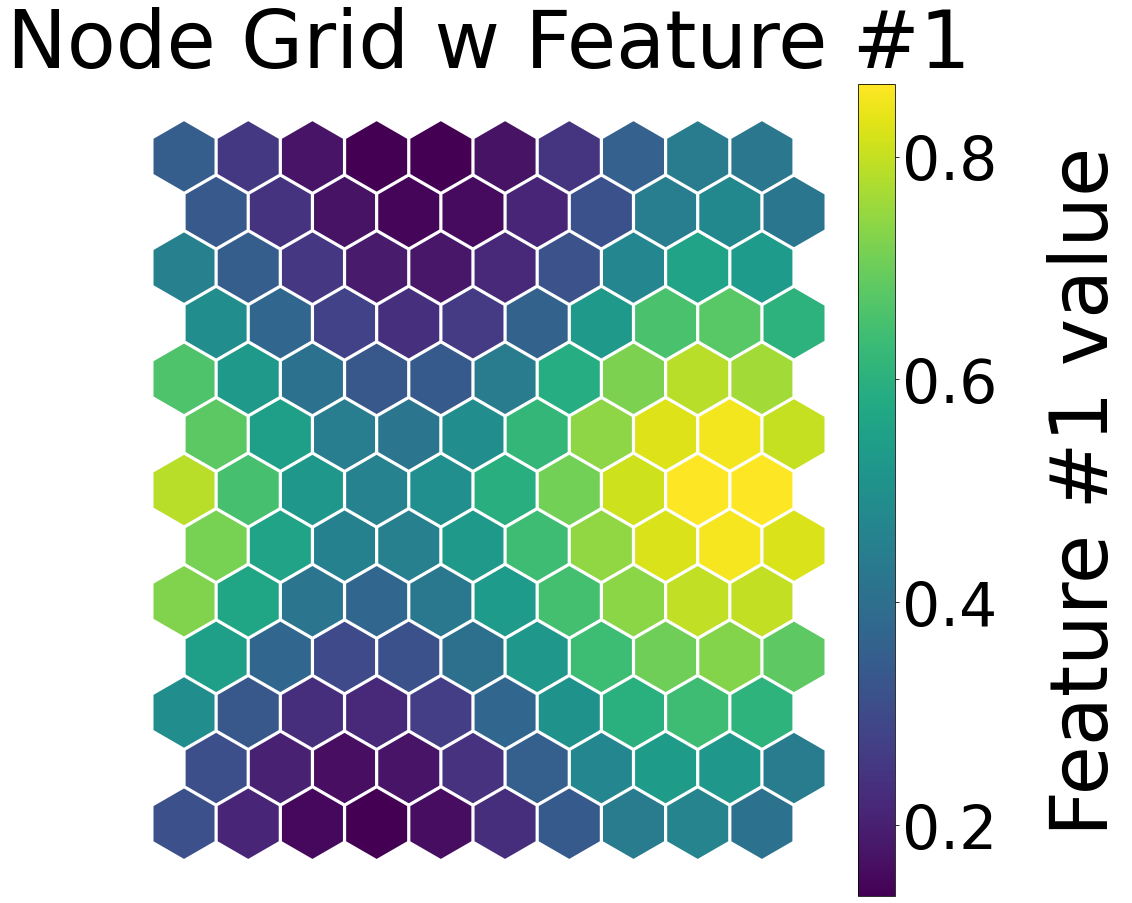

In [9]:
net.nodes_graph(colnum=1)

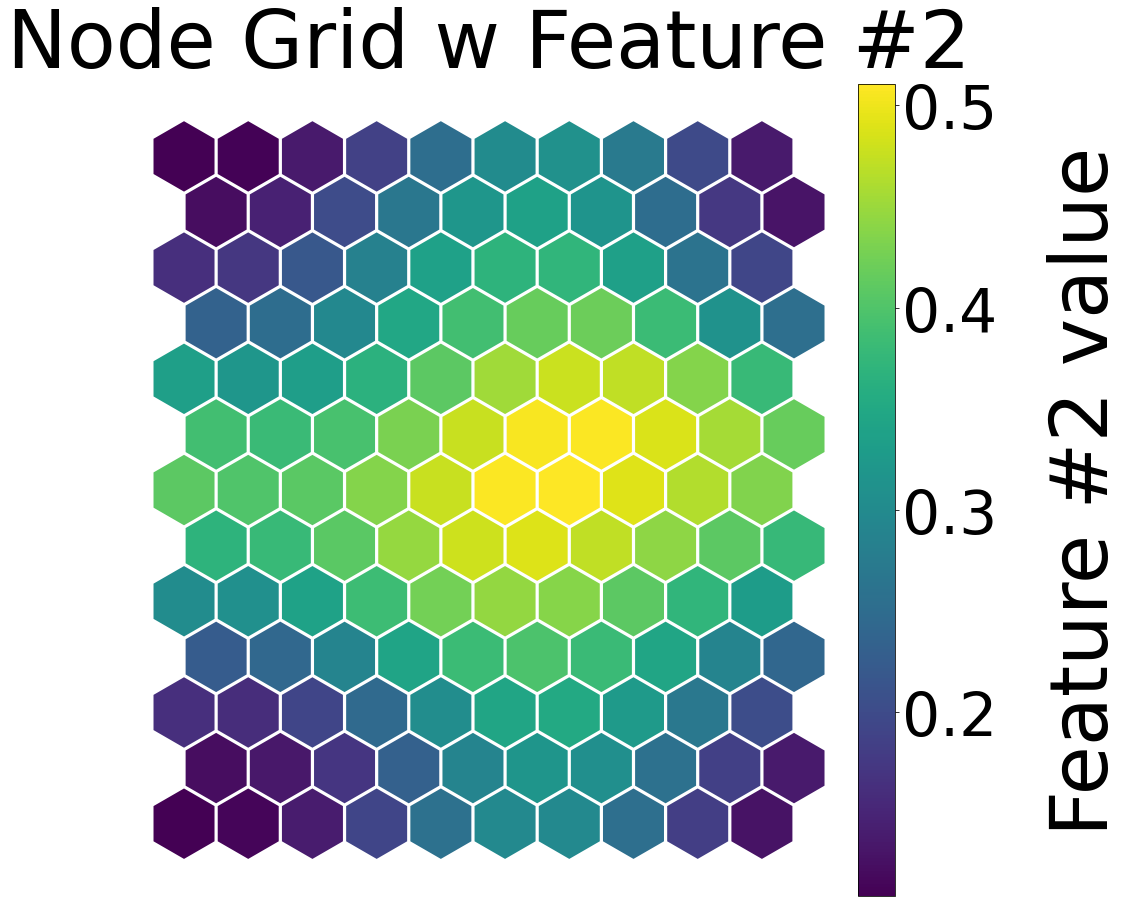

In [10]:
net.nodes_graph(colnum=2)

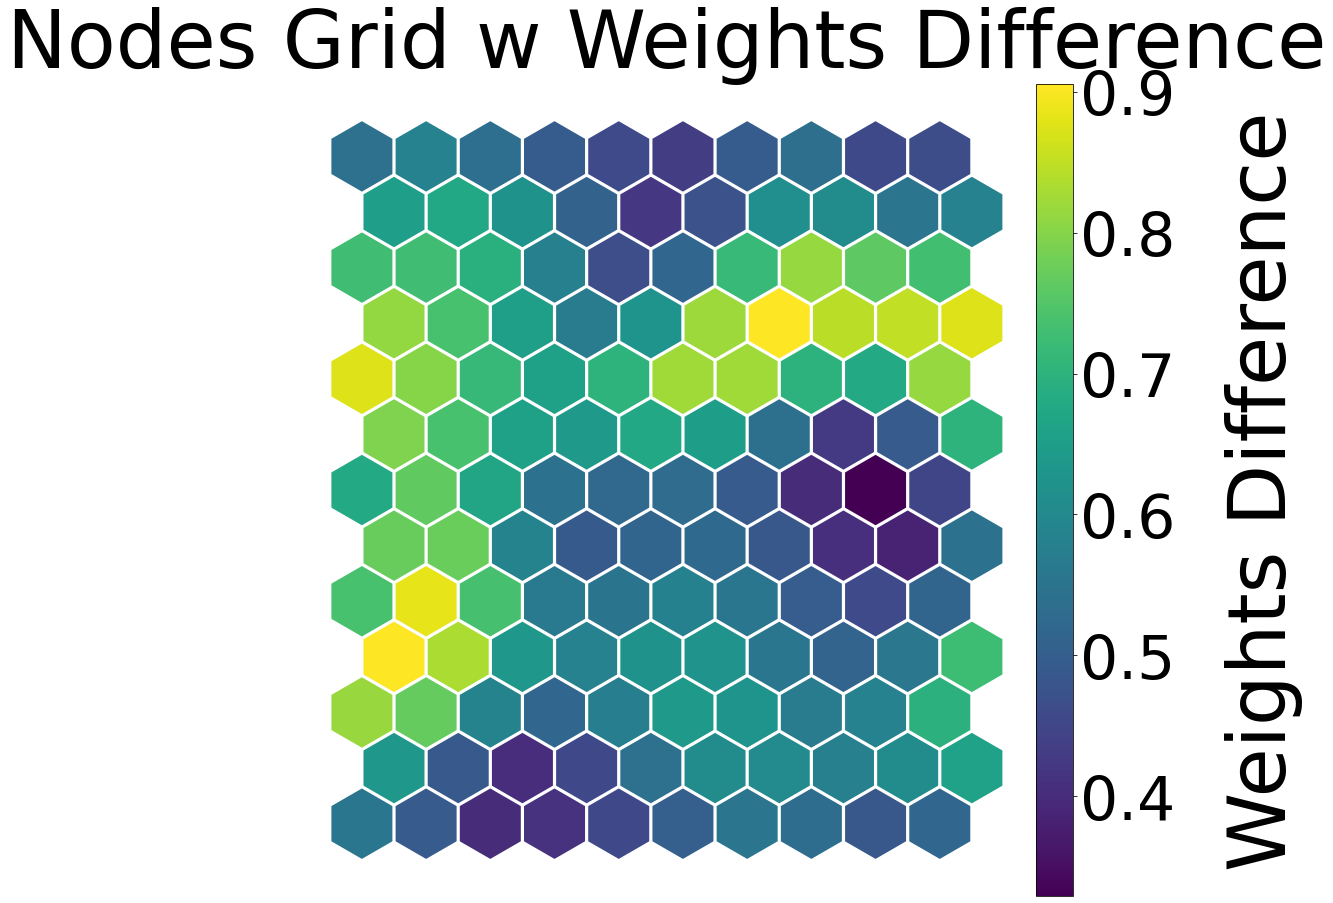

In [11]:
net.diff_graph()

In [21]:
prj=np.array(net.project(X))

<Figure size 432x288 with 0 Axes>

Видим примерно 5 кластеров:
1. Преобладает % мужчин, средний уровень упоминания в иностранных источниках,средний ВВП
2. Мужчин и женщин приблизительно равное количество , высокий уровень упоминания в иностранных источниках,высокий ВВП
3. Мужчин и женщин приблизительно равное количество, средний уровень упоминания в иностранных источниках,средний ВВП
4. Преобладает % женщин,низкий уровень упоминания в иностранных источниках,низкий ВВП
5. Мужчин и женщин приблизительно равное количество, низкий уровень упоминания в иностранных источниках,средний ВВП

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(prj)

In [16]:
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

Сравниваем результаты иерархической кластеризации и SOM. Низкое совпадение.

In [17]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,kmeans.labels_)

0.3045320855096137

Сравниваем результаты кластеризации k-средних и SOM. Низкое совпадение.

In [18]:
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [19]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.4040315849693275